In [24]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

In [25]:
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_std)

In [26]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['PC1'] = wine_pca[:,0]
df['PC2'] = wine_pca[:,1]
df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,PC1,PC2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,3.316751,-1.443463
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2.209465,0.333393
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2.516740,-1.031151


- 군집화 모델 생성과 학습

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(wine_std)

KMeans(n_clusters=3, random_state=2021)

In [33]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [34]:
df['target'] = wine.target
df['cluster'] = kmeans.labels_
df.groupby(['target', 'cluster']).count()

alcohol  malic_acid  ash  alcalinity_of_ash  magnesium  \
target cluster                                                           
0      0             59          59   59                 59         59   
1      0              3           3    3                  3          3   
       1             65          65   65                 65         65   
       2              3           3    3                  3          3   
2      2             48          48   48                 48         48   

                total_phenols  flavanoids  nonflavanoid_phenols  \
target cluster                                                    
0      0                   59          59                    59   
1      0                    3           3                     3   
       1                   65          65                    65   
       2                    3           3                     3   
2      2                   48          48                    48   

                proanthocyanins  color_intensity  hue  \
target cluster                                          
0      0                     59               59   59   
1      0                      3                3    3   
       1                     65               65   65   
       2                      3                3    3   
2      2                     48               48   48   

                od280/od315_of_diluted_wines  proline  PC1  PC2  
target cluster                                                   
0      0                                  59       59   59   59  
1      0                                   3        3    3    3  
       1                                  65       65   65   65  
       2                                   3        3    3    3  
2      2                                  48       48   48   48

- 시각화

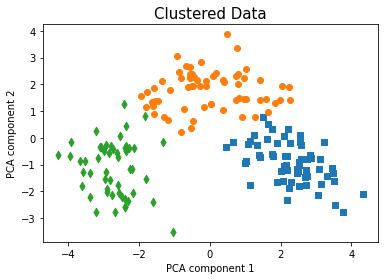

In [35]:
markers = ['s','o','d']

for i, marker in enumerate(markers):
    x_axis_data = df[df.cluster == i]['PC1']
    y_axis_data = df[df.cluster == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
plt.xlabel('PCA component 1'); plt.ylabel('PCA component 2')
plt.title('Clustered Data', fontsize=15)
plt.show()

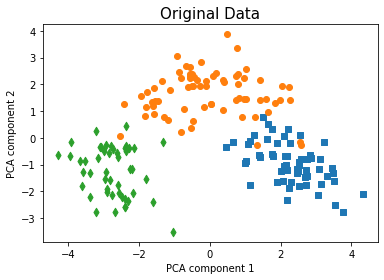

In [36]:
for i, marker in enumerate(markers):
    x_axis_data = df[df.target == i]['PC1']
    y_axis_data = df[df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
plt.xlabel('PCA component 1'); plt.ylabel('PCA component 2')
plt.title('Original Data', fontsize=15)
plt.show()

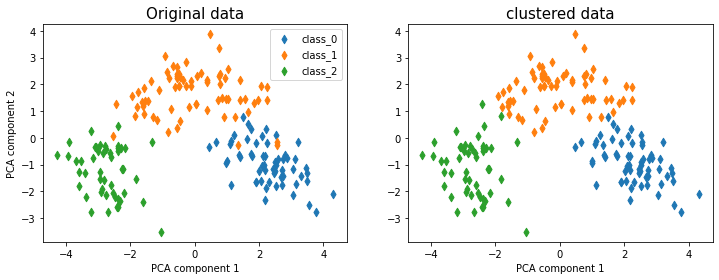

In [39]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
for k, column in enumerate(['target', 'cluster']):
    ax = axs[k]
    for i, maker in enumerate(markers):
        x_axis_data = df[df[column] == i]['PC1']
        y_axis_data = df[df[column] == i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker=marker, label=wine.target_names[i])

    if k == 0:      #Original
        ax.set_title('Original data', fontsize=15)
        ax.set_ylabel('PCA component 2')
        ax.legend()
    else:           #cluster
        ax.set_title('clustered data', fontsize=15)
    ax.set_xlabel('PCA component 1')
plt.show()
